In [1]:
import numpy as np
import numpy.linalg as lin
import scipy.stats as sts
import scipy.integrate as intgr
import scipy.optimize as opt
import matplotlib.pyplot as plt
import scipy.special as sp

## a)

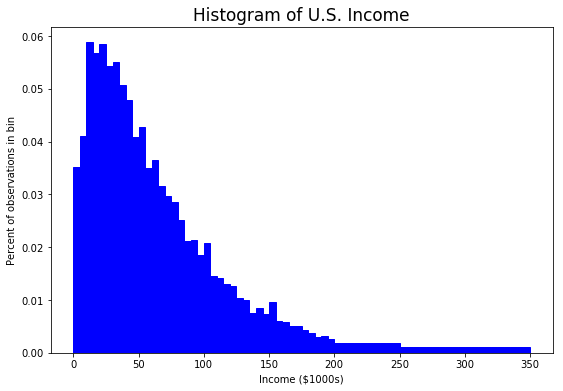

In [2]:
data = np.loadtxt('/Users/rubyzhang/Desktop/UChicago/OSML/BootCamp2017/Econ/Wk4_StrEst/data/usincmoms.txt',delimiter='\t')
midpoints1 = np.append(data[:-2,1],np.arange(data[-3,1]+5000,350000,5000))
percents1 = np.append(data[:-2,0],np.append(np.ones(10)*data[-2,0]/10,np.ones(20)*data[-1,0]/20))
avg_inc = np.mean(percents1@midpoints1)
std = np.std(percents1*midpoints1)

plt.subplots(figsize=(9, 6))
plt.bar(midpoints1/1000, percents1, width=5, facecolor='blue', edgecolor='blue')
plt.title('Histogram of U.S. Income', fontsize=17)
plt.xlabel(r'Income ($1000s)')
plt.ylabel(r'Percent of observations in bin')
plt.show()

## b)

In [3]:
# Define function that generates values of lognormal PDF
def lognorm_pdf(xvals, mu, sigma):
    pdf_vals= (1/(xvals*sigma * np.sqrt(2 * np.pi)) *
                    np.exp(-(np.log(xvals) - mu)**2 /(2 * sigma**2)))
    pdf_vals[pdf_vals==0] = 1e-10
    return pdf_vals

def model_moments(midpoints, mu, sigma):
    mod_moments = 5e3*lognorm_pdf(midpoints, mu, sigma)
    return mod_moments

def err_vec(midpoints, percents, mu, sigma, simple):
    moms_model = model_moments(midpoints, mu,sigma)
    moms_data = percents
    if simple:
        err_vec = moms_model - moms_data
    else:
        err_vec = (moms_model - moms_data) / moms_data
    return err_vec

def criterion(params, *args):
    mu, sigma = params
    midpoints, percents, W = args
    err = err_vec(midpoints, percents, mu, sigma, simple=True)
    crit_val = np.dot(np.dot(err.T, W), err) 
    return crit_val 

In [4]:
midpoints = data[:,1]
percents = data[:,0]
percents[-2] = percents[-2]/10
percents[-1] = percents[-1]/20

mu_init = np.log(avg_inc)
sig_init = 1.5
params_init = np.array([mu_init, sig_init])
W_hat = np.diag(percents)
gmm_args = (midpoints, percents, W_hat)
bounds = ((None, None), (1e-10, None))
results = opt.minimize(criterion, params_init, args=(gmm_args), bounds=bounds)
mu_GMM1, sig_GMM1 = results.x
print(results)
print('mu_GMM1=', mu_GMM1, ' sig_GMM1=', sig_GMM1)
print('Criterion Value=', results.fun)

      fun: 3.1957493734041355e-05
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([  4.54796384e-06,   8.32543331e-06])
  message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 15
      nit: 4
   status: 0
  success: True
        x: array([ 10.89798721,   1.06246639])
mu_GMM1= 10.8979872131  sig_GMM1= 1.06246639341
Criterion Value= 3.1957493734e-05


/Users/rubyzhang/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:3: RuntimeWarning: divide by zero encountered in true_divide
  app.launch_new_instance()
/Users/rubyzhang/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:4: RuntimeWarning: divide by zero encountered in log
/Users/rubyzhang/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:4: RuntimeWarning: invalid value encountered in multiply


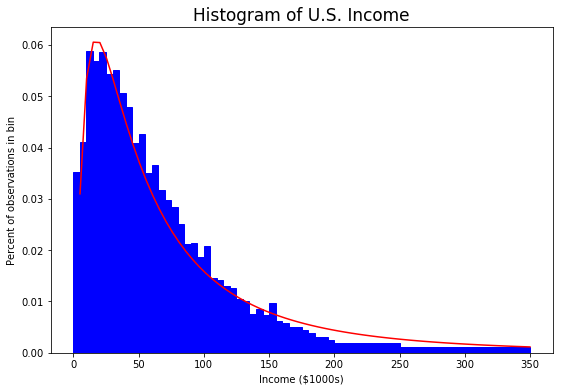

In [5]:
x = np.linspace(0,350000,70)
y1 = 5000*lognorm_pdf(x, mu_GMM1, sig_GMM1)
plt.subplots(figsize=(9, 6))
plt.bar(midpoints1/1000, percents1, width=5, facecolor='blue', edgecolor='blue')
plt.plot(x/1000,y1,'r-')
plt.title('Histogram of U.S. Income', fontsize=17)
plt.xlabel(r'Income ($1000s)')
plt.ylabel(r'Percent of observations in bin')
plt.show()

# c)

In [6]:
def model_moments(midpoints, alpha, beta):
    mod_moments = 5e3*sts.gamma.pdf(midpoints, alpha, scale=beta)
    return mod_moments

def err_vec(midpoints, percents, alpha, beta, simple):
    moms_model = model_moments(midpoints, alpha,beta)
    moms_data = percents
    if simple:
        err_vec = moms_model - moms_data
    else:
        err_vec = (moms_model - moms_data) / moms_data
    return err_vec

def criterion(params, *args):
    alpha,beta = params
    midpoints, percents, W = args
    err = err_vec(midpoints, percents, alpha, beta, simple=False)
    crit_val = np.dot(np.dot(err.T, W), err) 
    return crit_val 

In [7]:
midpoints = data[:,1]
percents = data[:,0]
percents[-2] = percents[-2]/10
percents[-1] = percents[-1]/20

alpha_init = 1.4
beta_init = 20000
params_init = np.array([alpha_init, beta_init])
W_hat = np.diag(percents)
gmm_args = (midpoints, percents, W_hat)
bounds = ((1e-10, None), (1e-10, None))
results = opt.minimize(criterion, params_init, args=(gmm_args), bounds=bounds)
alpha_GMM1, beta_GMM1 = results.x
print(results)
print('alpha_GMM1=', alpha_GMM1, ' beta_GMM1=', beta_GMM1)
print('Criterion Value=', results.fun)

      fun: 0.014369546254083218
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([ -7.78422465e-06,  -1.04083409e-09])
  message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 96
      nit: 29
   status: 0
  success: True
        x: array([  1.50461214e+00,   4.04597431e+04])
alpha_GMM1= 1.50461213654  beta_GMM1= 40459.7431056
Criterion Value= 0.0143695462541


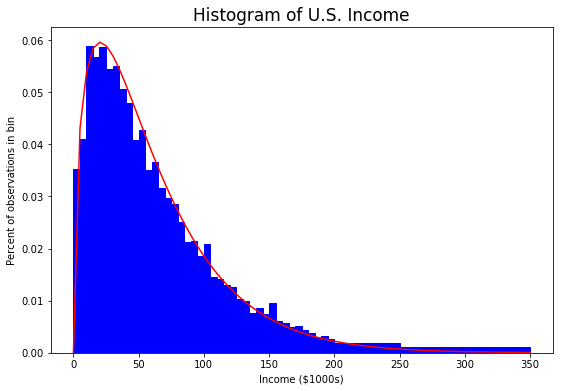

In [8]:
x = np.linspace(0,350000,70)
y2 = 5000*sts.gamma.pdf(x, alpha_GMM1, scale=beta_GMM1)
plt.subplots(figsize=(9, 6))
plt.bar(midpoints1/1000, percents1, width=5, facecolor='blue', edgecolor='blue')
plt.plot(x/1000,y2,'r-')
plt.title('Histogram of U.S. Income', fontsize=17)
plt.xlabel(r'Income ($1000s)')
plt.ylabel(r'Percent of observations in bin')
plt.show()

# d)

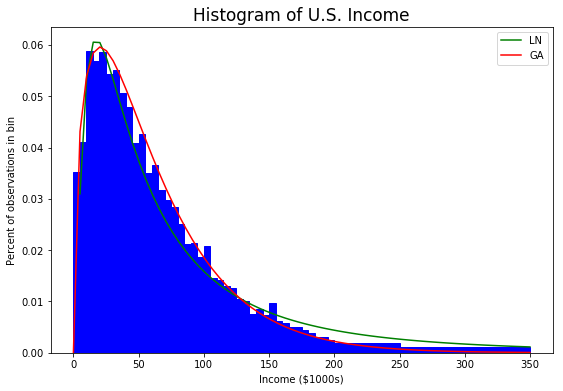

In [9]:
x = np.linspace(0,350000,70)
plt.subplots(figsize=(9, 6))
plt.bar(midpoints1/1000, percents1, width=5, facecolor='blue', edgecolor='blue')
plt.plot(x/1000,y1,'g-',label='LN')
plt.plot(x/1000,y2,'r-',label='GA')
plt.title('Histogram of U.S. Income', fontsize=17)
plt.xlabel(r'Income ($1000s)')
plt.legend()
plt.ylabel(r'Percent of observations in bin')
plt.show()

Overall, the lognormal distribution seems to fit the data better than the gamma distribution, which overapproximates and underapproximates the data at different points. This is expected since the criterion value for the gamma distribution ($2^{-4}$) is higher than the lognormal distribution ($3.2^{-5}$).

# e)

In [29]:
err = err_vec(midpoints, percents, alpha_GMM1, beta_GMM1, simple=False)
err = np.array([err])
VCV2 = np.dot(err.T,err)/midpoints.shape[0]
W_hat2 = lin.pinv(VCV2)

alpha_init = 2
beta_init = 20000
params_init = np.array([alpha_init, beta_init])
gmm_args = (midpoints, percents, W_hat2)
bounds = ((1e-10, None), (1e-10, None))
results = opt.minimize(criterion, params_init, args=(gmm_args), bounds=bounds)
alpha_GMM2, beta_GMM2 = results.x
print(results)
print('alpha_GMM1=', alpha_GMM2, ' beta_GMM1=', beta_GMM2)
print('Criterion Value=', results.fun)

      fun: 3.134031298407345e-15
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([ -1.52382596e-07,   2.73644544e-09])
  message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 27
      nit: 6
   status: 0
  success: True
        x: array([  3.07306644e+00,   2.00000003e+04])
alpha_GMM1= 3.07306643662  beta_GMM1= 20000.000262
Criterion Value= 3.13403129841e-15


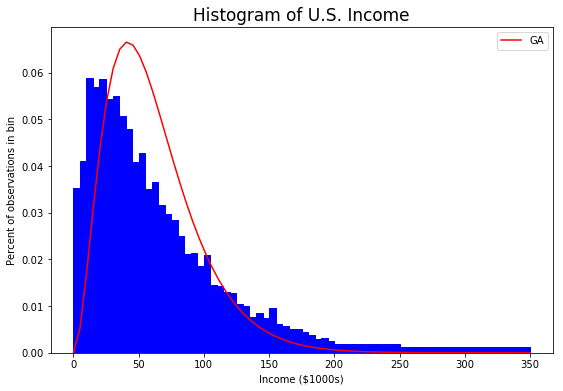

In [30]:
x = np.linspace(0,350000,70)
y3 = 5000*sts.gamma.pdf(x, alpha_GMM2, scale=beta_GMM2)
plt.subplots(figsize=(9, 6))
plt.bar(midpoints1/1000, percents1, width=5, facecolor='blue', edgecolor='blue')
plt.plot(x/1000,y3,'r-',label='GA')
plt.title('Histogram of U.S. Income', fontsize=17)
plt.xlabel(r'Income ($1000s)')
plt.legend()
plt.ylabel(r'Percent of observations in bin')
plt.show()

$\beta$ has halved from c), the $\alpha$ value changed from 1.5 to 3. It shifted the gamma distribution towards the right. The criterion value for the new distribution is much smaller, at $3^{-15}$ even though it doesn't fit as well.